## Первое задание

GC состав промоутерных регионов генома отличается от остальных областей (https://doi.org/10.1007/s00018-003-3088-6). В данном задании мы смоделируем эту ситуацию используя HMM. Задана скрытая марковская модель с двумя скрытыми состояниями (промоутерная и НЕ-промоутерная область генома) и четыре наблюдаемых состояния – нуклеотиды в последовательности (A, G, C, T). Вероятность перехода из промоутера в НЕ-промоутер равняется 0.1, в обратную сторону 0.2. Выходные вероятности в промоутерном регионе равны A=T=0.1, C=G=0.4; для НЕ-промоутерного региона A=T=0.3, C=G=0.2. Начальные состояния системы равновероятны.

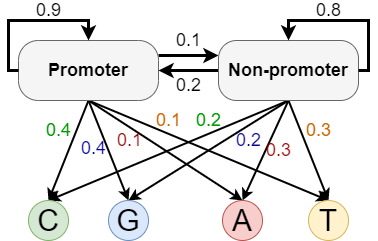

На вход подается наблюдаемая последовательность нуклеотидов. Выведите вероятность получения такой последовательности при заданной модели. Ваш ответ должен отличаться от верного не больше чем на 1e-10.

Sample Input:

ATCG


Sample Output:

0.0036420000

In [1]:
import numpy as np

In [11]:
A[0][0]

0.9

In [13]:
A[1][0]

0.1

In [15]:
# pp np-p, p-np np-np 
A = np.array([[0.9,0.2],[0.1,0.8]])
# prom - c g a t , np -  c g a t
#B = np.array([0.4, 0.4, 0.1, 0.1],[0.2, 0.2, 0.3, 0.3])
seq1 = 'ATCG'
bkeys_prom = {'C':0.4, 'G':0.4, 'A':0.1, 'T':0.1 }
bkeys_np = {'C':0.2, 'G':0.2, 'A':0.3, 'T':0.3 }
# тут  будет использоваться алгоритм backward-forward, суммироваться альфа коэф. 

def alpha(t=1, porn='p', seq='ATCG'):
    
    if(t==1):
        j = seq[0]
        alpha_p = 0.5*bkeys_prom[j]
        alpha_n = 0.5*bkeys_np[j]
        if porn=='p':
            return alpha_p
        else:
            return alpha_n
    else:
        #i = seq[t-2]
        j = seq[t-1]
        alpha_p = alpha(t-1,porn='p',seq =seq )*A[0][0]*bkeys_prom[j] + alpha(t-1, 'np', seq = seq )*A[0][1]*bkeys_prom[j]
        alpha_n = alpha(t-1,porn='p', seq = seq )*A[1][0]*bkeys_np[j] + alpha(t-1, 'np', seq = seq )*A[1][1]*bkeys_np[j] 
        if porn=='p':
            return alpha_p
        else:
            return alpha_n     
    
ap = alpha(t=len(seq1), porn='p', seq = seq1)
anp =  alpha(t=len(seq1), porn='np', seq = seq1)  

a = ap + anp
print(a)       



0.0036420000000000003


In [17]:
# чистовой код
import numpy as np
# pp np-p, p-np np-np 
A = np.array([[0.9,0.2],[0.1,0.8]])

seq1 = input()
bkeys_prom = {'C':0.4, 'G':0.4, 'A':0.1, 'T':0.1 }
bkeys_np = {'C':0.2, 'G':0.2, 'A':0.3, 'T':0.3 }
# тут  будет использоваться алгоритм backward-forward, суммироваться альфа коэф. 

def alpha(t=1, porn='p', seq='ATCG'):
    
    if(t==1):
        j = seq[0]
        alpha_p = 0.5*bkeys_prom[j]
        alpha_n = 0.5*bkeys_np[j]
        if porn=='p':
            return alpha_p
        else:
            return alpha_n
    else:
        #i = seq[t-2]
        j = seq[t-1]
        alpha_p = alpha(t-1,porn='p',seq =seq )*A[0][0]*bkeys_prom[j] + alpha(t-1, 'np', seq = seq )*A[0][1]*bkeys_prom[j]
        alpha_n = alpha(t-1,porn='p', seq = seq )*A[1][0]*bkeys_np[j] + alpha(t-1, 'np', seq = seq )*A[1][1]*bkeys_np[j] 
        if porn=='p':
            return alpha_p
        else:
            return alpha_n     
    
ap = alpha(t=len(seq1), porn='p', seq = seq1)
anp =  alpha(t=len(seq1), porn='np', seq = seq1)  

a = ap + anp
print(a)       



0.0036420000000000003


## Задание 2

На вход подается наблюдаемая последовательность нуклеотидов. Выведите наиболее вероятную последовательность скрытых состояний используя алгоритм Витерби. Выведите 'P' для состояния промоутер и 'N' для состояния НЕ-промоутер.

Sample Input:

ATCG

Sample Output:

NNPP

In [52]:
def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]
argmax(A[0])

0

In [72]:
# put your python code here
import numpy as np

def viterbi_algorithm(A, B, pi, seq):
    T = len(seq)
    N = len(A)
    
    delta = np.zeros((T, N))
    psi = np.zeros((T, N), dtype=int)
    
    # Вычисление значений в первой ячейке массива delta
    for i in range(N):
        delta[0][i] = pi[i] * B[seq[0]][i]
    
    # Вычисление delta и psi для каждого i
    for t in range(1, T):
        for j in range(N):
            delta[t][j], psi[t][j] = max((delta[t-1][i] * A[i][j] * B[seq[t]][j], i) for i in range(N))
    
    # Поиск максимального значения delta в последнем столбце
    max_prob = max(delta[T-1])
    
    # Возвращаемая последовательность скрытых состояний - для последнего
    q = [np.argmax(delta[T-1])]
    
    # Восстановление последовательности скрытых состояний
    for t in range(T-1, 0, -1):
        # insert object before index
        q.insert(0, psi[t][q[0]])
    
    return max_prob, q

# Заданные параметры модели
A = np.array([[0.9, 0.1], [0.2, 0.8]])
B = {'A': [0.1, 0.3], 'G': [0.4, 0.2], 'C': [0.4, 0.2], 'T': [0.1, 0.3]}
pi = [0.5, 0.5]
sequence = list(input())

# Вызов функции и вывод результата
prob, hidden_states = viterbi_algorithm(A, B, pi, sequence)
for x in hidden_states:
    if x == 1:
        print('N', end='')
    else:
        print('P', end='')


NNPP

## Задание 3


На вход подается наблюдаемая последовательность нуклеотидов. Выведите для каждой позиции вероятность того, что она находится в состоянии промоутер и НЕ-промоутер.

Ответ состоит из двух строк с последовательностями чисел, разделенных пробелами. В первой строке выведите вероятности состояния `промоутер`, во второй строке – вероятности состояния `НЕ-промоутер`. Выводите числа с точность два знака после запятой.

Sample Input:

ATCG


Sample Output:

0.20 0.29 0.59 0.70
0.80 0.71 0.41 0.30
Напишите программ